In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/demo01.csv')
print(df.head())

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [4]:
dtypes = df.dtypes
print(dtypes)

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


In [5]:
df.isna().sum()

,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0
idade,0
tempo_emprego,0


In [6]:
percentage = (df.isnull().sum() / len(df)) * 100
percentage

,0
sexo,0.0
posse_de_veiculo,0.0
posse_de_imovel,0.0
qtd_filhos,0.0
tipo_renda,0.0
educacao,0.0
estado_civil,0.0
tipo_residencia,0.0
idade,0.0
tempo_emprego,0.0


In [7]:
titanic_sem_na = df.dropna(axis=1)

In [8]:
data = {
    'Nome da Variável': [
        'ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
        'CNT_FAM_MEMBERS'
    ],
    'Tipo de Dado': [
        'int64', 'object', 'object', 'object', 'int64',
        'float64', 'object', 'object', 'object', 'object',
        'int64', 'int64', 'int64', 'int64', 'int64',
        'int64', 'object', 'float64'
    ]
}

In [9]:
df1_info = pd.DataFrame(data)

In [10]:
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'CODE_GENDER': ['F', 'M', 'F', 'M'],
    'FLAG_OWN_CAR': ['N', 'Y', 'N', 'Y'],
    'FLAG_OWN_REALTY': ['Y', 'Y', 'N', 'Y'],
    'CNT_CHILDREN': [0, 1, 2, 0],
    'AMT_INCOME_TOTAL': [50000, 60000, 70000, 80000],
    'NAME_INCOME_TYPE': ['Working', 'Working', 'Working', 'Pensioner'],
    'NAME_EDUCATION_TYPE': ['Secondary', 'Higher', 'Higher', 'Secondary'],
    'NAME_FAMILY_STATUS': ['Single', 'Married', 'Single', 'Married'],
    'NAME_HOUSING_TYPE': ['House', 'Apartment', 'House', 'Apartment'],
    'DAYS_BIRTH': [-10000, -12000, -15000, -18000],
    'DAYS_EMPLOYED': [-2000, -3000, -4000, -5000],
    'FLAG_MOBIL': [1, 1, 1, 1],
    'FLAG_WORK_PHONE': [1, 1, 0, 0],
    'FLAG_PHONE': [1, 1, 1, 1],
    'FLAG_EMAIL': [1, 0, 1, 1],
    'OCCUPATION_TYPE': ['Laborers', 'Managers', 'Laborers', 'Sales'],
    'CNT_FAM_MEMBERS': [1, 2, 3, 2]
})

In [11]:
def calcular_qtd_categorias(nome_variavel):
    tipo_dado = df1_info.loc[df1_info['Nome da Variável'] == nome_variavel, 'Tipo de Dado'].values[0]
    if tipo_dado == 'object':
        return df1[nome_variavel].nunique()
    return 0

df1_info['qtd_categorias'] = df1_info['Nome da Variável'].apply(calcular_qtd_categorias)

print("DataFrame com Nomes, Tipos de Dados e Quantidade de Categorias:")
print(df1_info)

DataFrame com Nomes, Tipos de Dados e Quantidade de Categorias:
       Nome da Variável Tipo de Dado  qtd_categorias
0                    ID        int64               0
1           CODE_GENDER       object               2
2          FLAG_OWN_CAR       object               2
3       FLAG_OWN_REALTY       object               2
4          CNT_CHILDREN        int64               0
5      AMT_INCOME_TOTAL      float64               0
6      NAME_INCOME_TYPE       object               2
7   NAME_EDUCATION_TYPE       object               2
8    NAME_FAMILY_STATUS       object               2
9     NAME_HOUSING_TYPE       object               2
10           DAYS_BIRTH        int64               0
11        DAYS_EMPLOYED        int64               0
12           FLAG_MOBIL        int64               0
13      FLAG_WORK_PHONE        int64               0
14           FLAG_PHONE        int64               0
15           FLAG_EMAIL        int64               0
16      OCCUPATION_TYPE       objec

In [12]:
df1_dummies = pd.get_dummies(df1, columns=[
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
])

In [13]:
df2_ml_ready = df1_dummies.copy()

print("DataFrame preparado para entrada no Scikit-learn:")
print(df2_ml_ready)

DataFrame preparado para entrada no Scikit-learn:
   ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0   1             0             50000      -10000          -2000           1   
1   2             1             60000      -12000          -3000           1   
2   3             2             70000      -15000          -4000           1   
3   4             0             80000      -18000          -5000           1   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  ...  \
0                1           1           1                1  ...   
1                1           1           0                2  ...   
2                0           1           1                3  ...   
3                0           1           1                2  ...   

   NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher  \
0                      True                       False   
1                      True                        True   
2                      True    

In [14]:
df3 = pd.DataFrame({
    'possui_email': [1, 0, 1, 0, 1, 0, 1, 0],
    'posse_de_veiculo': [1, 1, 0, 0, 1, 0, 0, 1],
    'mau': [0, 1, 0, 1, 0, 1, 1, 0]
})

In [15]:
tabela_cruzada_email = pd.crosstab(df3['possui_email'], df3['mau'], rownames=['possui_email'], colnames=['mau'])
tabela_cruzada_veiculo = pd.crosstab(df3['posse_de_veiculo'], df3['mau'], rownames=['posse_de_veiculo'], colnames=['mau'])

In [16]:
taxa_email = tabela_cruzada_email[1] / tabela_cruzada_email.sum(axis=1)
taxa_veiculo = tabela_cruzada_veiculo[1] / tabela_cruzada_veiculo.sum(axis=1)

print("Tabela Cruzada entre 'possui_email' e 'mau':")
print(tabela_cruzada_email)
print("\nTaxa de 'mau = 1' por 'possui_email':")
print(taxa_email)

print("\nTabela Cruzada entre 'posse_de_veiculo' e 'mau':")
print(tabela_cruzada_veiculo)
print("\nTaxa de 'mau = 1' por 'posse_de_veiculo':")
print(taxa_veiculo)

Tabela Cruzada entre 'possui_email' e 'mau':
mau           0  1
possui_email      
0             1  3
1             3  1

Taxa de 'mau = 1' por 'possui_email':
possui_email
0    0.75
1    0.25
dtype: float64

Tabela Cruzada entre 'posse_de_veiculo' e 'mau':
mau               0  1
posse_de_veiculo      
0                 1  3
1                 3  1

Taxa de 'mau = 1' por 'posse_de_veiculo':
posse_de_veiculo
0    0.75
1    0.25
dtype: float64


In [17]:
df.head(10)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
5,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
7,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
8,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,False
9,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,False


In [18]:
df.dtypes

,0
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [19]:
# Visualizando os valores únicos da coluna do tipo object
valores_unicos = df['sexo'].unique()
valores_unicos1 = df['posse_de_veiculo'].unique()
valores_unicos2 = df['posse_de_imovel'].unique()

print("Valores únicos na coluna")
print(valores_unicos)
print(valores_unicos1)
print(valores_unicos2)

Valores únicos na coluna
['M' 'F']
['Y' 'N']
['Y' 'N']


In [20]:
# Substituindo 'Y' por 0.0 e 'N' por 1.0
df['posse_de_veiculo'] = df['posse_de_veiculo'].replace({'Y': 0.0, 'N': 1.0})
df['posse_de_imovel'] = df['posse_de_imovel'].replace({'Y': 0.0, 'N': 1.0})

# Exibindo o DataFrame após a transformação
print(df)

      sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0        M               0.0              0.0           0   
1        F               1.0              0.0           0   
2        F               1.0              0.0           0   
3        M               0.0              0.0           0   
4        F               0.0              1.0           0   
...    ...               ...              ...         ...   
16645    F               1.0              0.0           0   
16646    F               1.0              0.0           0   
16647    M               0.0              0.0           0   
16648    M               0.0              0.0           0   
16649    F               1.0              0.0           0   

                 tipo_renda                       educacao  \
0                   Working  Secondary / secondary special   
1      Commercial associate  Secondary / secondary special   
2      Commercial associate  Secondary / secondary special   
3                  

<ipython-input-20-db90a013c17c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['posse_de_veiculo'] = df['posse_de_veiculo'].replace({'Y': 0.0, 'N': 1.0})
<ipython-input-20-db90a013c17c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['posse_de_imovel'] = df['posse_de_imovel'].replace({'Y': 0.0, 'N': 1.0})


In [21]:
# Substituindo 'M' por 0.0 e 'F' por 1.0
df['sexo'] = df['sexo'].replace({'M': 0.0, 'F': 1.0})

# Exibindo o DataFrame após a transformação
print(df)

       sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0       0.0               0.0              0.0           0   
1       1.0               1.0              0.0           0   
2       1.0               1.0              0.0           0   
3       0.0               0.0              0.0           0   
4       1.0               0.0              1.0           0   
...     ...               ...              ...         ...   
16645   1.0               1.0              0.0           0   
16646   1.0               1.0              0.0           0   
16647   0.0               0.0              0.0           0   
16648   0.0               0.0              0.0           0   
16649   1.0               1.0              0.0           0   

                 tipo_renda                       educacao  \
0                   Working  Secondary / secondary special   
1      Commercial associate  Secondary / secondary special   
2      Commercial associate  Secondary / secondary special   
3      

<ipython-input-21-2d8ec37a5b66>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sexo'] = df['sexo'].replace({'M': 0.0, 'F': 1.0})


In [22]:
# Convertendo as colunas específicas de int para float
colunas_para_converter = ['qtd_filhos', 'possui_celular', 'possui_fone_comercial', 'possui_fone', 'possui_email']
df[colunas_para_converter] = df[colunas_para_converter].astype(float)

# Exibindo o tipo das colunas após a conversão
print("\nTipos após conversão:")
print(df.dtypes)


Tipos após conversão:
sexo                     float64
posse_de_veiculo         float64
posse_de_imovel          float64
qtd_filhos               float64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular           float64
possui_fone_comercial    float64
possui_fone              float64
possui_email             float64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


In [23]:
# Convertendo True para 0.0 e False para 1.0
df['mau'] = df['mau'].astype(float)

# Ajustando os valores para que True se torne 0.0 e False se torne 1.0
df['mau'] = 1.0 - df['mau']

print(df)

       sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0       0.0               0.0              0.0         0.0   
1       1.0               1.0              0.0         0.0   
2       1.0               1.0              0.0         0.0   
3       0.0               0.0              0.0         0.0   
4       1.0               0.0              1.0         0.0   
...     ...               ...              ...         ...   
16645   1.0               1.0              0.0         0.0   
16646   1.0               1.0              0.0         0.0   
16647   0.0               0.0              0.0         0.0   
16648   0.0               0.0              0.0         0.0   
16649   1.0               1.0              0.0         0.0   

                 tipo_renda                       educacao  \
0                   Working  Secondary / secondary special   
1      Commercial associate  Secondary / secondary special   
2      Commercial associate  Secondary / secondary special   
3      

In [24]:
# Separando a variável resposta e as variáveis explicativas
X = df.drop(columns=['mau','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])  # Variáveis explicativas
y = df['mau']  # Variável resposta

# Dividindo o conjunto em treinamento e validação (70% treinamento, 30% validação)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo os resultados
print("Conjunto de Treinamento (X):")
print(X_train)
print("\nConjunto de Treinamento (y):")
print(y_train)

print("\nConjunto de Validação (X):")
print(X_val)
print("\nConjunto de Validação (y):")
print(y_val)

Conjunto de Treinamento (X):
       sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos      idade  \
965     1.0               1.0              0.0         0.0  32.616438   
7874    0.0               0.0              0.0         2.0  47.271233   
10319   0.0               0.0              0.0         2.0  53.778082   
8807    1.0               1.0              0.0         0.0  41.487671   
438     1.0               1.0              0.0         0.0  50.613699   
...     ...               ...              ...         ...        ...   
11284   0.0               0.0              1.0         1.0  39.654795   
11964   0.0               0.0              1.0         0.0  30.457534   
5390    1.0               0.0              0.0         0.0  64.345205   
860     1.0               1.0              1.0         0.0  35.353425   
15795   0.0               0.0              1.0         2.0  32.843836   

       tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
965         6.7671

In [25]:
# Definindo o modelo da árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

In [26]:
# Treinando o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

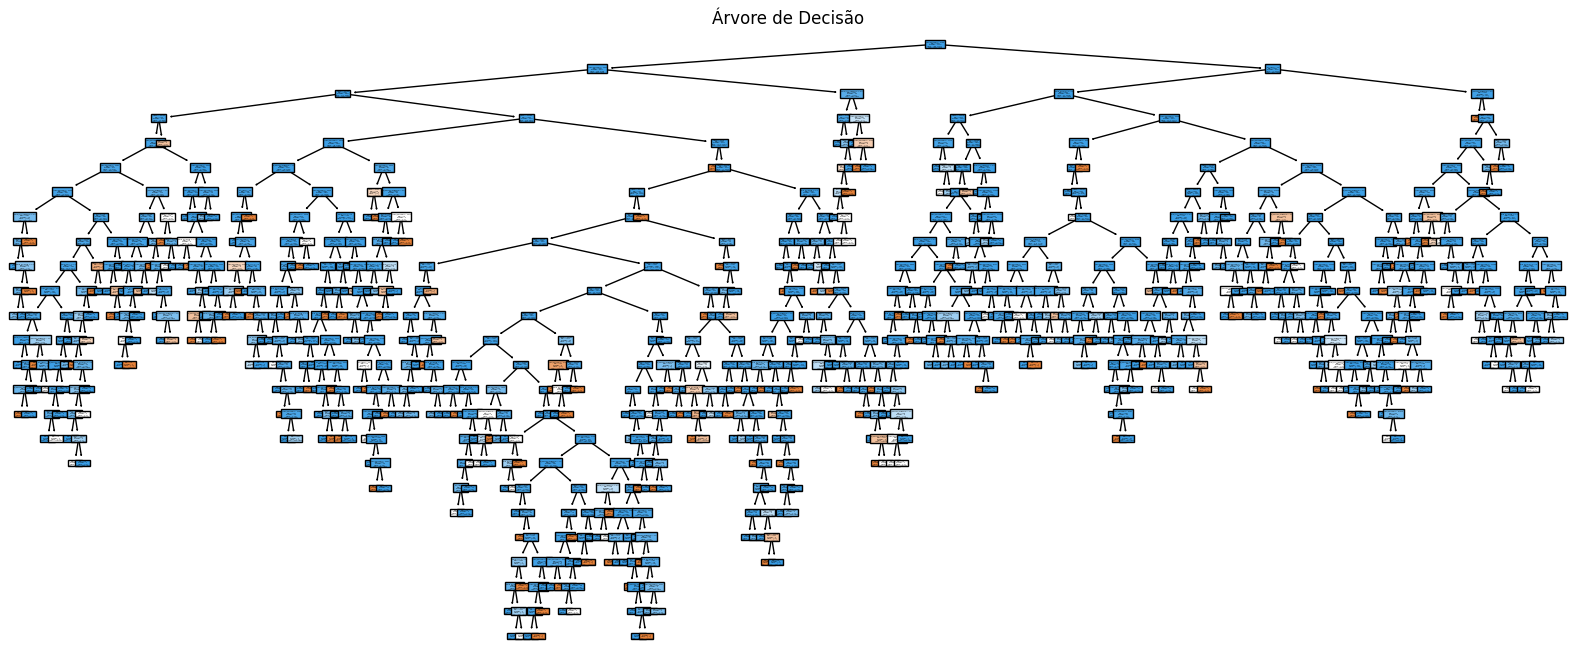

In [32]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20, 8))
plot_tree(modelo_arvore, filled=True, feature_names=X_train.columns, class_names=['aprovados', 'reprovados'])
plt.title('Árvore de Decisão')
plt.show()

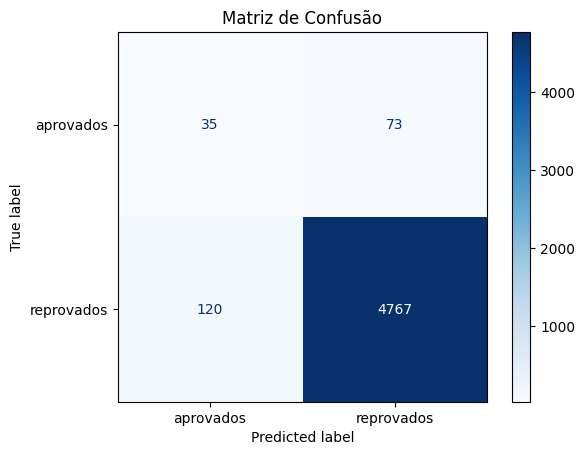

In [33]:
# Fazendo previsões no conjunto de validação
y_pred = modelo_arvore.predict(X_val)

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_val, y_pred)

# Visualizando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao,
                              display_labels=['aprovados', 'reprovados'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

In [34]:
# Fazendo previsões no conjunto de treinamento
y_train_pred = modelo_arvore.predict(X_train)

# Calculando a acurácia
acuracia = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {acuracia:.2f}')

Acurácia na base de treinamento: 0.99


In [36]:
# Treinando a árvore de decisão
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)

# Classificando a base de teste
y_pred = tree_model.predict(X_val)

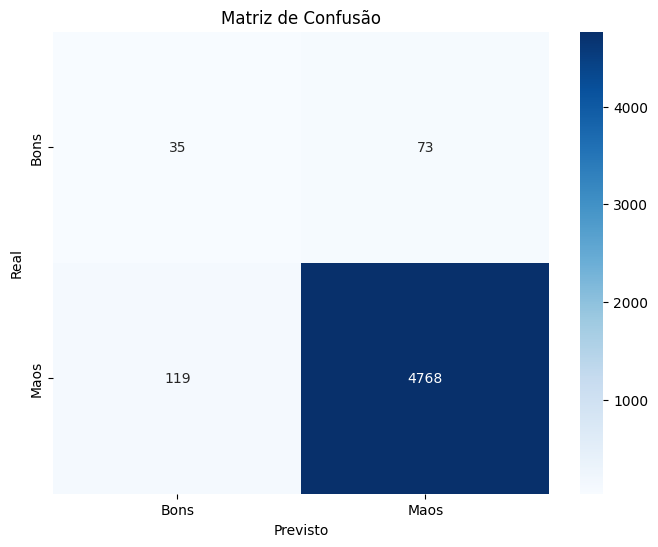

In [37]:
# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_val, y_pred)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bons', 'Maos'], yticklabels=['Bons', 'Maos'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

In [38]:
# Calculando a acurácia
accuracy_test = accuracy_score(y_val, y_pred)
print(f'Acurácia da base de teste: {accuracy_test:.2f}')

# Acurácia da base de treinamento
y_train_pred = tree_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia da base de treinamento: {accuracy_train:.2f}')

Acurácia da base de teste: 0.96
Acurácia da base de treinamento: 0.99


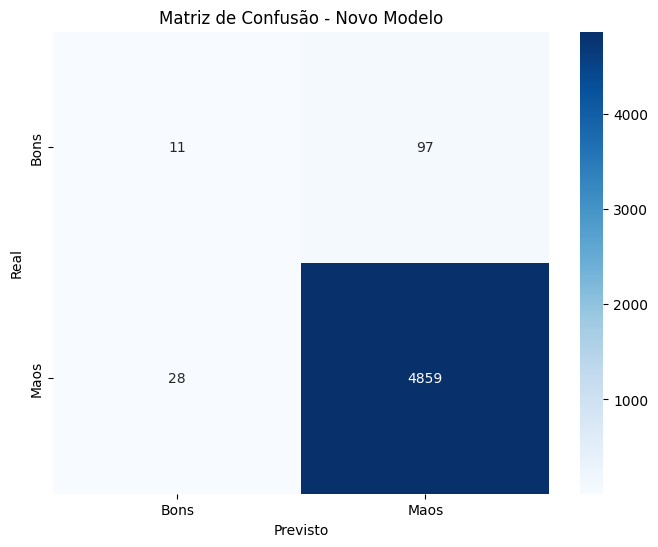

Proporção de proponentes classificados como "maus": 0.99


In [39]:
# Treinando uma nova árvore
tree_model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
tree_model_new.fit(X_train, y_train)

# Classificando a base de teste
y_pred_new = tree_model_new.predict(X_val)

# Matriz de classificação
conf_matrix_new = confusion_matrix(y_val, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bons', 'Maos'], yticklabels=['Bons', 'Maos'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Novo Modelo')
plt.show()

# Proporção de proponentes classificados como 'maus'
maus_proportion = np.sum(y_pred_new == 1) / len(y_pred_new)
print(f'Proporção de proponentes classificados como "maus": {maus_proportion:.2f}')

In [40]:
# Acurácia se todos fossem classificados como 'bons'
y_all_good = np.zeros_like(y_val)  # Classificando todos como 'bons'
accuracy_all_good = accuracy_score(y_val, y_all_good)
print(f'Acurácia se classificássemos todos como "bons": {accuracy_all_good:.2f}')

Acurácia se classificássemos todos como "bons": 0.02
